In [152]:
## import the libraries
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pylab as plt


In [153]:
## load the dataset
train_titanic = pd.read_csv('train.csv')
test_titanic = pd.read_csv('test.csv')

In [154]:
train_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


reading the data

all the variables has loads of missing values 

In [155]:
train_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [156]:
test_titanic.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


EDA:

Survival Analysis: Analyze the survival rate based on different factors such as class, sex, age, etc.

Passenger Demographics: Explore the distribution of passengers by class, sex, age, etc.

variables    definition    keys 

survival	Survival	0 = No, 1 = Yes

pclass	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd

sex	

Age	Age in years	

sibsp	# of siblings / spouses aboard the Titanic	

parch	# of parents / children aboard the Titanic	

ticket	Ticket number	

fare	Passenger fare	

cabin	Cabin number	

embarked	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton

In [157]:
#import libaries

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import metrics
from math import sqrt


In [158]:

# Combining two Titanic datasets: test and train

# Concatenate row-wise (stacking them vertically)
titanic_data = pd.concat([train_titanic, test_titanic], axis=0)

# Reset the index after concatenation
titanic_data.reset_index(drop=True, inplace=True)

In [159]:
titanic_data.head() 


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [160]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


In [161]:
titanic_data.notnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,True,True,True,True,True,True,True,True,True,True,False,True
1,True,True,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True,False,True
3,True,True,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,True,False,True,True,True,False,True,True,True,True,False,True
1305,True,False,True,True,True,True,True,True,True,True,True,True
1306,True,False,True,True,True,True,True,True,True,True,False,True
1307,True,False,True,True,True,False,True,True,True,True,False,True


In [181]:
#checking for missing values

titanic_data.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [162]:
train_titanic['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

(-1.0999984055537222,
 1.099999899980942,
 -1.0999986687098138,
 1.0999939297167656)

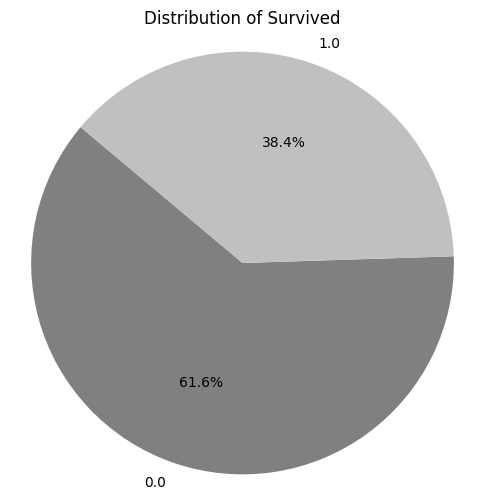

In [198]:
import pandas as pd
import matplotlib.pyplot as plt

# Count occurrences of each category in the 'Survived' column
Survived_counts = titanic_data['Survived'].value_counts()

# Plot the pie chart
plt.figure(figsize=(6, 6))
plt.pie(Survived_counts, labels=Survived_counts.index, autopct='%1.1f%%', startangle=140, colors= ['grey','silver'])
plt.title('Distribution of Survived')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle


(-1.099998096769131, 1.099997961362887, -1.099997661811672, 1.0999961128251603)

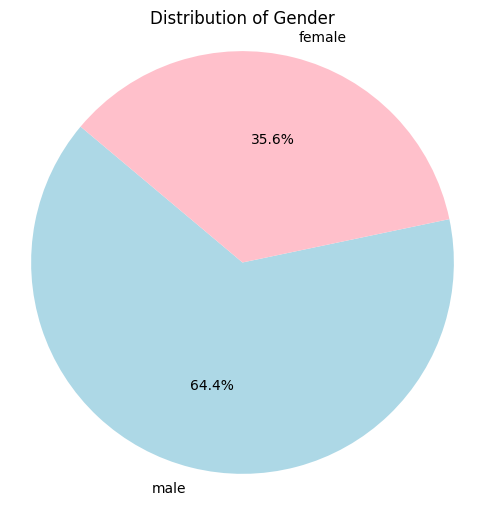

In [180]:
import pandas as pd
import matplotlib.pyplot as plt

# Count occurrences of each category in the 'Sex' column
gender_counts = titanic_data['Sex'].value_counts()

# Plot the pie chart
plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140, colors= ['lavender','pink'])
plt.title('Distribution of Gender')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle



(-1.0999982533151553,
 1.0999999166667371,
 -1.0999992300971613,
 1.0999907922799335)

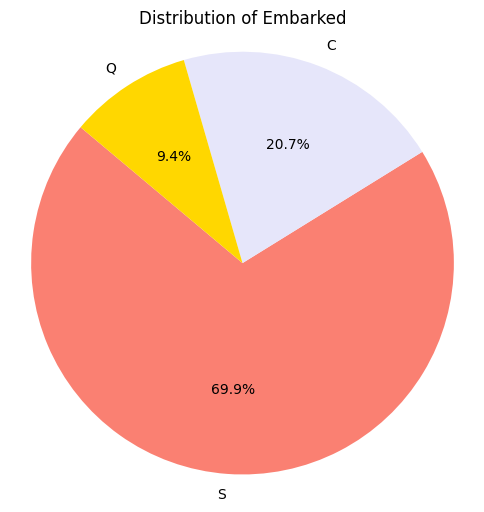

In [199]:
#pie chart of embarked 

# Count occurrences of each category in the 'Sex' column
embarked_counts = titanic_data['Embarked'].value_counts()
# Plot the pie chart
plt.figure(figsize=(6, 6))
plt.pie(embarked_counts, labels=embarked_counts.index, autopct='%1.1f%%', startangle=140, colors=['salmon', 'lavender','gold'])
plt.title('Distribution of Embarked')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Drop irrelevant columns or columns with too many missing values
titanic_data = titanic_data.drop(["PassengerId", "Name", "Ticket", "Cabin"], axis=1)

# Handle missing values
titanic_data = titanic_data.dropna()

# Convert categorical variables to numerical using LabelEncoder
label_encoder = LabelEncoder()
titanic_data["Sex"] = label_encoder.fit_transform(titanic_data["Sex"])
titanic_data["Embarked"] = label_encoder.fit_transform(titanic_data["Embarked"])

# Split the data into features (X) and target variable (y)
X = titanic_data.drop("Survived", axis=1)
y = titanic_data["Survived"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train k-nearest neighbors classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train, y_train)

# Predict on the testing set
knn_predictions = knn_classifier.predict(X_test)

# Evaluate k-nearest neighbors classifier
knn_accuracy = accuracy_score(y_test, knn_predictions)
print("kNN Accuracy:", knn_accuracy)




kNN Accuracy: 0.6923076923076923


what we know:

Rows with missing values are dropped using the dropna() method. potential limitation?


what does my data show:

the k-nearest neighbors (kNN) model correctly predicted the survival status (whether they survived or not) for approximately 69.23% of them.

the kNN model 69% accurate 


In [ ]:
# Train decision tree classifier
decision_tree_classifier = DecisionTreeClassifier()
decision_tree_classifier.fit(X_train, y_train)

# Predict on the testing set
tree_predictions = decision_tree_classifier.predict(X_test)

# Evaluate decision tree classifier
tree_accuracy = accuracy_score(y_test, tree_predictions)
print("Decision Tree Accuracy:", tree_accuracy)

Decision Tree Accuracy: 0.7272727272727273


Similarly, the decision tree model correctly predicted the survival status for approximately 67.83%

In [ ]:
## this time splitting sex and embarked to see the difference 
#

# Drop irrelevant columns or columns with too many missing values 
titanic_data = titanic_data.drop(["Embarked"], axis=1)

# Handle missing values
titanic_data = titanic_data.dropna()

# Convert categorical variables to numerical using LabelEncoder
label_encoder = LabelEncoder()
titanic_data["Sex"] = label_encoder.fit_transform(titanic_data["Sex"])

# Split the data into features (X) and target variable (y)
F = titanic_data.drop("Survived", axis=1)
m = titanic_data["Survived"]

# Split the data into training and testing sets
F_train, F_test, m_train, m_test = train_test_split(F, m, test_size=0.2, random_state=42)

# Train k-nearest neighbors classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(F_train, m_train)

# Predict on the testing set
knn_predictions = knn_classifier.predict(F_test)

# Evaluate k-nearest neighbors classifier
knn_accuracy = accuracy_score(m_test, knn_predictions)
print("kNN Accuracy:", knn_accuracy)

kNN Accuracy: 0.6853146853146853


^
the analysis focuses solely on the gender of the passengers and its relationship with survival.

result

kNN accuracy is the same just focusing on the survial based on just the gender

but the decision tree is way lower 



In [ ]:
# Train decision tree classifier
decision_tree_classifier = DecisionTreeClassifier()
decision_tree_classifier.fit(F_train,m_train)

# Predict on the testing set
tree_predictions = decision_tree_classifier.predict(F_test)

# Evaluate decision tree classifier
tree_accuracy = accuracy_score(y_test, tree_predictions)
print("Decision Tree Accuracy:", tree_accuracy)

Decision Tree Accuracy: 0.6923076923076923
